<a href="https://colab.research.google.com/github/anthonytr1/RWE-creek/blob/main/RWE%20Creek%20Farm%20Performance%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Read the CSV file into a pandas DataFrame
rwe='/content/RWE Creek.xlsx'
data = pd.read_excel(rwe)




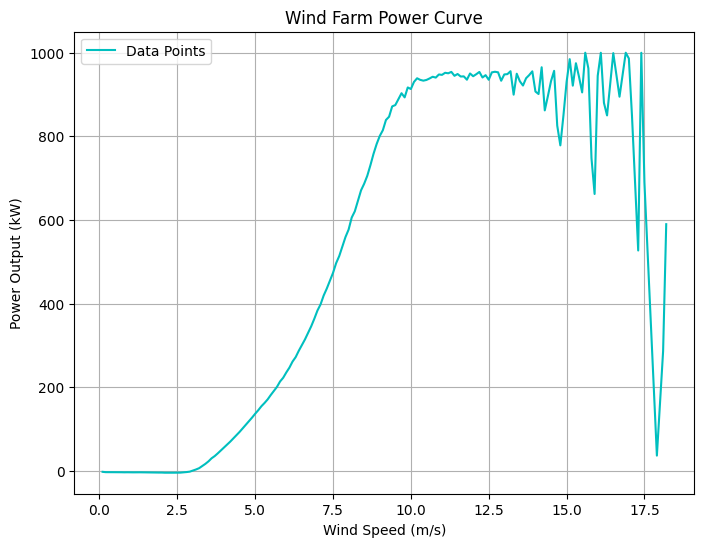

<Figure size 640x480 with 0 Axes>

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit



# Clean and prepare the data
data = data.dropna(subset=['Amb_WindSpeed_Avg', 'Grd_Prod_Pwr_Avg'])  # Remove rows with missing values
data = data.sort_values(by='Amb_WindSpeed_Avg')  # Sort the data by Amb_WindSpeed_Avg


average_power = data.groupby('Amb_WindSpeed_Avg')['Grd_Prod_Pwr_Avg'].mean()
wind_speed_bins_left = average_power.index




plt.figure(figsize=(8, 6))
plt.plot(wind_speed_bins_left, average_power, 'c', label='Data Points')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Output (kW)')
plt.title('Wind Farm Power Curve')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('power curve.png')


In [99]:
# Find the wind speed at which the power output is maximum
rated_power_speed = data.loc[data['Grd_Prod_Pwr_Avg'].idxmax(), 'Amb_WindSpeed_Avg']

# Get the corresponding rated power output
rated_power_output = data.loc[data['Grd_Prod_Pwr_Avg'].idxmax(), 'Grd_Prod_Pwr_Avg']

print(f"Rated Power Speed: {rated_power_speed} m/s")
print(f"Rated Power Output: {rated_power_output} kW")


Rated Power Speed: 12.2 m/s
Rated Power Output: 1000.3305785123966 kW


In [90]:

# Find the minimum and maximum power output values
min_power_output = data['Grd_Prod_Pwr_Avg'].min()
max_power_output = data['Grd_Prod_Pwr_Avg'].max()

# Print the power output range
print(f"Power Output Range: {min_power_output} kW  {max_power_output} kW")


Power Output Range: -15.867768595041323 kW  1000.3305785123966 kW


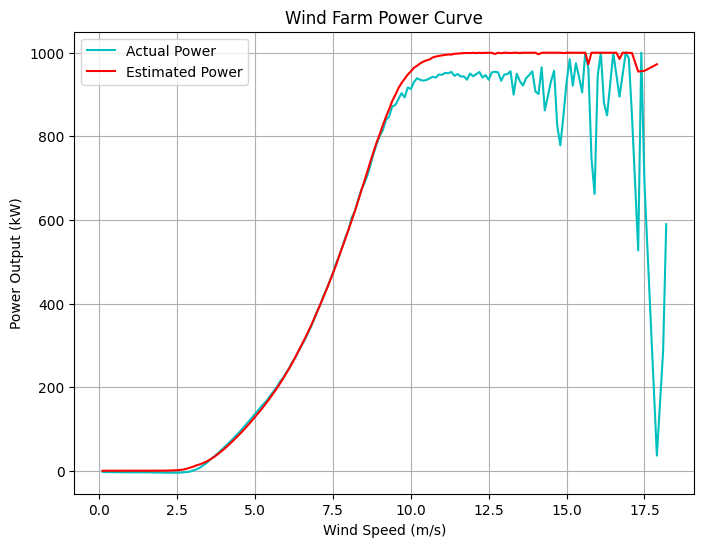

<Figure size 640x480 with 0 Axes>

In [100]:
# Power curve accuracy


# Clean and prepare the data
data = data.dropna(subset=['Amb_WindSpeed_Est_Avg', 'Grd_Prod_PsblePwr_Avg'])  # Remove rows with missing values
data = data.sort_values(by='Amb_WindSpeed_Est_Avg')  # Sort the data by Amb_WindSpeed_Avg


average_power1 = data.groupby('Amb_WindSpeed_Est_Avg')['Grd_Prod_PsblePwr_Avg'].mean()
wind_speed_bins_left1 = average_power1.index



plt.figure(figsize=(8, 6))
plt.plot(wind_speed_bins_left, average_power, 'c', label='Actual Power')
plt.plot(wind_speed_bins_left1,average_power1, 'r', label= 'Estimated Power')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Output (kW)')
plt.title('Wind Farm Power Curve')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('power curve accuracy.png')


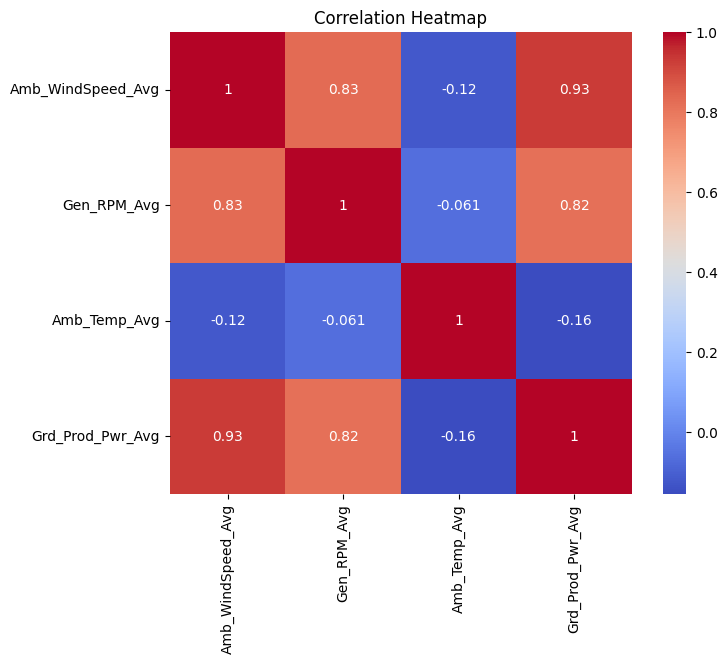

<Figure size 640x480 with 0 Axes>

In [101]:
corr_matrix = data[['Amb_WindSpeed_Avg','Gen_RPM_Avg','Amb_Temp_Avg','Grd_Prod_Pwr_Avg'] ].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()
plt.savefig('correlation.png')


In [93]:
from datetime import datetime


timestamp_format = '%Y-%m-%d %H:%M:%S.%f'
timestamps = data['TTimeStamp']

# Convert the timestamps to datetime objects
converted_timestamps = [datetime.strptime(timestamp, timestamp_format) for timestamp in timestamps]

# Sort the timestamps in ascending order
sorted_timestamps = sorted(converted_timestamps)

# Calculate the time difference between consecutive timestamps
total_time_difference = 0
for i in range(len(sorted_timestamps) - 1):
    time_difference = abs((sorted_timestamps[i + 1] - sorted_timestamps[i]).total_seconds())
    total_time_difference += time_difference

print("Total time in seconds:", round(total_time_difference/3600,0), " hours")


Total time in seconds: 2006.0  hours


In [104]:

# Get the unique turbine numbers from the dataset
turbine_numbers = data['TURBINE_ID'].unique()

# Calculate the availability time for each turbine
availability_times = []
for turbine_number in turbine_numbers:
    turbine_data = data[data['TURBINE_ID'] == turbine_number]
    availability_time = turbine_data['HCnt_Avg_Run'].sum()
    availability_times.append(availability_time)
    availability_ratio = round((availability_time / total_time_difference)*100,2)
    availability_ratios.append(availability_ratio)


mean_availability_time = (sum(availability_times) / len(availability_times))/3600
print("Mean Availability Time:", mean_availability_time, " hours")


mean_availability = sum(availability_ratios) / len(availability_ratios)
print("Mean Availability Ratios:",round(mean_availability,2) , " %")




Mean Availability Time: 1979.44  hours
Mean Availability Ratios: 98.69  %


In [95]:
capacity_factor = data['Grd_Prod_Pwr_Avg'].sum() / (data['Grd_Prod_PsblePwr_Avg'].sum() * len(data))
efficiency = data['Grd_Prod_Pwr_Avg'].sum() / (data['HCnt_Avg_Run'].sum() * data['Grd_Prod_PsblePwr_Avg'].mean())



print('Capacity Factor:', capacity_factor)
print('Efficiency:', efficiency, ' %')

Capacity Factor: 6.123648255750024e-06
Efficiency: 0.0016390213111861192  %


In [96]:
categories = ['HCnt_Avg_Gen1',  'HCnt_Avg_Gen2', 'HCnt_Avg_SrvOn']


total_downtime_duration = {category: 0 for category in categories}


for index, row in data.iterrows():
    # Calculate the downtime duration for each category
    for category in categories:
        downtime = max(600 - row[category], 0)
        total_downtime_duration[category] += downtime

# Calculate the downtime mean for each category
downtime_mean = {category: total_downtime_duration[category] / 13 for category in categories}


for category, mean in downtime_mean.items():
    print(f"{category} Downtime Mean: {round(mean/3600,0)} hours")



HCnt_Avg_Gen1 Downtime Mean: 987.0 hours
HCnt_Avg_Gen2 Downtime Mean: 1282.0 hours
HCnt_Avg_SrvOn Downtime Mean: 1993.0 hours


In [97]:
categories = ['HCnt_Avg_Gen1', 'HCnt_Avg_Gen2', 'HCnt_Avg_SrvOn']

total_downtime_duration = {category: 0 for category in categories}


for index, row in data.iterrows():
    # Calculate the downtime duration for each category
    for category in categories:
        downtime = max(row[category], 0)  # Assign the category value as downtime if it is greater than 0
        total_downtime_duration[category] += downtime

# Calculate the downtime mean for each category
downtime_mean = {category: total_downtime_duration[category] / 13 for category in categories}

for category, mean in downtime_mean.items():
    print(f"{category} Downtime Mean: {round(mean/3600, 0)} hours")


HCnt_Avg_Gen1 Downtime Mean: 1032.0 hours
HCnt_Avg_Gen2 Downtime Mean: 737.0 hours
HCnt_Avg_SrvOn Downtime Mean: 25.0 hours


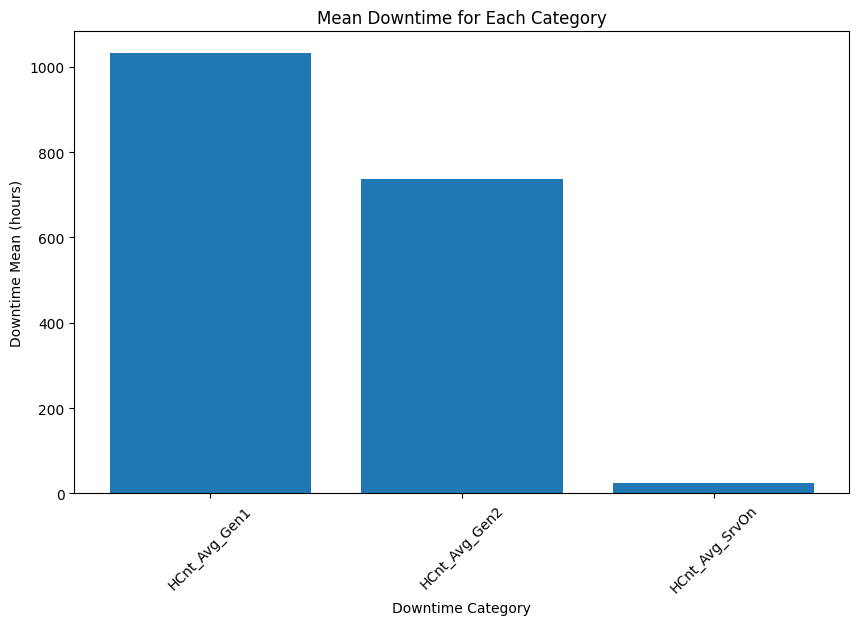

<Figure size 640x480 with 0 Axes>

In [103]:
downtime_means = [downtime_mean[category] / 3600 for category in categories]

# Plot the downtime means as a bar chart

plt.figure(figsize=(10, 6))
plt.bar(range(len(categories)), downtime_means)
plt.xlabel('Downtime Category')
plt.ylabel('Downtime Mean (hours)')
plt.title('Mean Downtime for Each Category')
plt.xticks(range(len(categories)), categories, rotation=45)

plt.show()
plt.savefig('downtime.png')